In [1]:
import pandas as pd
import numpy as np
import random
import os
import ast
import datetime
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

import matplotlib.pyplot as plt

In [2]:
# folder = 'C:/Users/edge hp/AppData/Roaming/MetaQuotes/Terminal/Common/Files/AUDUSD_M30_1W_MA/'
instrument = 'EURUSD'
folder = 'C:/Users/edge hp/AppData/Roaming/MetaQuotes/Terminal/Common/Files/PlayingMA_Exits_DataGetter-'+instrument+'-M30-SetA/'
files = os.listdir(folder)[-1::-1]

In [3]:
columns_ma = [col.lower() for col in \
           ['INITIAL_DEPOSIT','PROFIT','GROSS_PROFIT','GROSS_LOSS','MAX_PROFIT_TRADE','MAX_LOSS_TRADE',
           'CON_PROFIT_MAX','CON_PROFIT_MAX_TRADES','MAX_CON_WINS','MAX_CON_PROFIT_TRADES',
           'CON_LOSS_MAX','CON_LOSS_MAX_TRADES','MAX_CON_LOSSES','MAX_CON_LOSS_TRADES',
           'BALANCE_MIN','BALANCE_DD','BALANCE_DD_PCT','BALANCE_DD_REL','BALANCE_DD_REL_PCT',
           'EQUITY_MIN','EQUITY_DD','EQUITY_DD_PCT','EQUITY_DD_REL','EQUITY_DD_REL_PCT',
           'EXPECTED_PAYOFF','PROFIT_FACTOR','RECOVERY_FACTOR','SHARPE_RATIO','MIN_MARGIN_LEVEL','CUSTOM_ONTESTER',
           'DEALS','TRADES','PROFIT_TRADES','LOSS_TRADES','SHORT_TRADES','LONG_TRADES',
           'PROFIT_SHORT_TRADES','PROFIT_LONG_TRADES','PROFIT_TRADES_AVG_CON','LOSS_TRADES_AVG_CON',
           'iter','ma_period1','ma_period2','ma_period3','ma_period4','open_bars']]
columns_mae = [col.lower() for col in \
           ['INITIAL_DEPOSIT','PROFIT','GROSS_PROFIT','GROSS_LOSS','MAX_PROFIT_TRADE','MAX_LOSS_TRADE',
           'CON_PROFIT_MAX','CON_PROFIT_MAX_TRADES','MAX_CON_WINS','MAX_CON_PROFIT_TRADES',
           'CON_LOSS_MAX','CON_LOSS_MAX_TRADES','MAX_CON_LOSSES','MAX_CON_LOSS_TRADES',
           'BALANCE_MIN','BALANCE_DD','BALANCE_DD_PCT','BALANCE_DD_REL','BALANCE_DD_REL_PCT',
           'EQUITY_MIN','EQUITY_DD','EQUITY_DD_PCT','EQUITY_DD_REL','EQUITY_DD_REL_PCT',
           'EXPECTED_PAYOFF','PROFIT_FACTOR','RECOVERY_FACTOR','SHARPE_RATIO','MIN_MARGIN_LEVEL','CUSTOM_ONTESTER',
           'DEALS','TRADES','PROFIT_TRADES','LOSS_TRADES','SHORT_TRADES','LONG_TRADES',
           'PROFIT_SHORT_TRADES','PROFIT_LONG_TRADES','PROFIT_TRADES_AVG_CON','LOSS_TRADES_AVG_CON',
           'iter','ma_period1','ma_period2','ma_period3','ma_period4','ma_period5','ma_period6','ma_period7','ma_period8']]
columns = columns_mae
len(columns)

49

In [4]:
usecols = ['profit','profit_factor','recovery_factor','expected_payoff','sharpe_ratio','con_loss_max',
            'gross_loss','max_con_wins','balance_min','equity_min','con_profit_max','trades',
            'max_con_loss_trades','loss_trades','balance_dd_pct','equity_dd_pct','iter',
          'ma_period1','ma_period2','ma_period3','ma_period4','ma_period5','ma_period6','ma_period7','ma_period8']

In [5]:
data_preview = pd.read_csv(folder+files[0],nrows=5,encoding='utf-16',header=None,names=columns,usecols=usecols)

In [6]:
dtypes = data_preview.dtypes

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]
column_types = dict(zip(dtypes_col, dtypes_type))

for key, value in column_types.items():
    if value == 'float64':
        column_types[key] = 'float32'
    if value == 'int64':
        column_types[key] = 'int8'

In [7]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [ ]:
data = pd.DataFrame()
for i,file in enumerate(files):
    if i <= 52:
        data = pd.concat([data,pd.read_csv(folder+file,encoding='utf-16',header=None,dtype=column_types,names=columns)])
        print(file,mem_usage(data),data.shape)

20200202.csv 95.37 MB (390625, 49)
20200126.csv 196.70 MB (781250, 49)
20200119.csv 295.04 MB (1171875, 49)
20200112.csv 393.39 MB (1562500, 49)
20200105.csv 491.74 MB (1953125, 49)
20191229.csv 590.09 MB (2343750, 49)
20191222.csv 688.43 MB (2734375, 49)
20191215.csv 786.78 MB (3125000, 49)
20191208.csv 885.13 MB (3515625, 49)
20191201.csv 983.48 MB (3906250, 49)
20191124.csv 1081.82 MB (4296875, 49)
20191117.csv 1180.17 MB (4687500, 49)
20191110.csv 1278.52 MB (5078125, 49)
20191103.csv 1376.87 MB (5468750, 49)
20191027.csv 1475.21 MB (5859375, 49)
20191020.csv 1573.56 MB (6250000, 49)
20191013.csv 1671.91 MB (6640625, 49)
20191006.csv 1770.26 MB (7031250, 49)
20190929.csv 1868.61 MB (7421875, 49)
20190922.csv 1966.95 MB (7812500, 49)
20190915.csv 2065.30 MB (8203125, 49)
20190908.csv 2163.65 MB (8593750, 49)
20190901.csv 2262.00 MB (8984375, 49)
20190825.csv 2360.34 MB (9375000, 49)
20190818.csv 2458.69 MB (9765625, 49)
20190811.csv 2557.04 MB (10156250, 49)
20190804.csv 2655.39 MB 

In [ ]:
# Get id tag from input parameters
def abc(x):
    return str(x).zfill(2)
data['id'] = data.iter.map(abc) + "_" + data.ma_period1.map(abc) + "_" + data.ma_period2.map(abc) + "_" + data.ma_period3.map(abc) + "_" +\
             data.ma_period4.map(abc) + "_" + data.ma_period5.map(abc) + "_" + data.ma_period6.map(abc) + "_" + \
             data.ma_period7.map(abc) + "_" + data.ma_period8.map(abc)

In [ ]:
len(data.id.unique())

In [ ]:
# Get rid of unused columns
used_cols = ['profit','profit_factor','recovery_factor','expected_payoff','sharpe_ratio','con_loss_max',
            'gross_loss','max_con_wins','balance_min','equity_min','con_profit_max','trades',
            'max_con_loss_trades','loss_trades','balance_dd_pct','equity_dd_pct','id']

data = data[used_cols]
data.shape

In [ ]:
# Delete null runs (when enter condition == exit condition aka no trades possible)
data = data[(data.id.str[3:8] != data.id.str[9:14])]

In [ ]:
# Format data in correct order
data = data.sort_values('id')

In [ ]:
data.columns

In [ ]:
# Update column names
data.columns = [ 'a_' + col for col in data.columns ]

In [ ]:
data.columns

In [ ]:
# Get runs per iteration
runs_per_iter = data[(data.a_id.str[:2] == data.a_id.str[:2].unique()[0])].shape[0]
print(runs_per_iter)

In [ ]:
# Get id and profit from future run
v_id = data.a_id.shift(runs_per_iter*4).values
v_profit = data.a_profit.shift(runs_per_iter*4).values
data['v_id'] = v_id
data['v_profit'] = v_profit

In [ ]:
# Create standard stats file in order to scale live datasets appropriately
standardize_weights = [ [col, data[col].mean(), data[col].std()] for col in data.columns[:-3] ]
sw_file_name = 'standardize_weights\\' + str(datetime.datetime.now()).replace(' ','').replace('-','').replace(':','').split('.')[0][:-2] + '-' + instrument
pd.DataFrame(standardize_weights).to_csv(sw_file_name+'.csv')

In [ ]:
# Standardize data
cols = data.columns[:-3] # don't standardize ids and future profit
data[cols] = data[cols].apply(lambda x: (x - x.mean())/x.std()).astype('float32') # Standardize

In [ ]:
# Add lots of forward columns
cols = data.columns[:-2]
for col in cols:
    print('b'+''.join(list(col)[1:]))
    data['b'+''.join(list(col)[1:])] = data[col].shift(runs_per_iter)
for col in cols:
    print('c'+''.join(list(col)[1:]))
    data['c'+''.join(list(col)[1:])] = data[col].shift(runs_per_iter*2)
for col in cols:
    print('d'+''.join(list(col)[1:]))
    data['d'+''.join(list(col)[1:])] = data[col].shift(runs_per_iter*3)

In [ ]:
data.shape

In [ ]:
data.dtypes

In [ ]:
# data[['a_id','b_id','c_id','d_id','v_id']].tail(20)

In [ ]:
data.tail()

In [ ]:
data.shape

In [ ]:
# data = data[(data.iter!=0)&(data.iter!=1)&(data.iter!=2)&(data.iter!=3)]
data.dropna(inplace=True)

In [ ]:
data.shape

In [ ]:
data.head()

In [30]:
def get_score(p,score_type=0,weight_mod=0,graph=False,return_subset=False):
    subset = data[(data.a_profit>p[0])&(data.b_profit>p[1])&(data.c_profit>p[2])&(data.d_profit>p[3])\
              &(data.a_profit_factor>p[4])&(data.b_profit_factor>p[5])&(data.c_profit_factor>p[6])&(data.d_profit_factor>p[7])\
              &(data.a_recovery_factor>p[8])&(data.b_recovery_factor>p[9])&(data.c_recovery_factor>p[10])&(data.d_recovery_factor>p[11])\
              &(data.a_expected_payoff>p[12])&(data.b_expected_payoff>p[13])&(data.c_expected_payoff>p[14])&(data.d_expected_payoff>p[15])\
              &(data.a_sharpe_ratio>p[16])&(data.b_sharpe_ratio>p[17])&(data.c_sharpe_ratio>p[18])&(data.d_sharpe_ratio>p[19])\
              &(data.a_con_loss_max>p[20])&(data.b_con_loss_max>p[21])&(data.c_con_loss_max>p[22])&(data.d_con_loss_max>p[23])\
              &(data.a_gross_loss>p[24])&(data.b_gross_loss>p[25])&(data.c_gross_loss>p[26])&(data.d_gross_loss>p[27])\
              &(data.a_max_con_wins>p[28])&(data.b_max_con_wins>p[29])&(data.c_max_con_wins>p[30])&(data.d_max_con_wins>p[31])\
              &(data.a_balance_min>p[32])&(data.b_balance_min>p[33])&(data.c_balance_min>p[34])&(data.d_balance_min>p[35])\
              &(data.a_equity_min>p[36])&(data.b_equity_min>p[37])&(data.c_equity_min>p[38])&(data.d_equity_min>p[39])\
              &(data.a_con_profit_max>p[40])&(data.b_con_profit_max>p[41])&(data.c_con_profit_max>p[42])&(data.d_con_profit_max>p[43])\
#               \ 
              &(data.a_trades<p[44])&(data.b_trades<p[45])&(data.c_trades<p[46])&(data.d_trades<p[47])\
              &(data.a_max_con_loss_trades<p[48])&(data.b_max_con_loss_trades<p[49])&(data.c_max_con_loss_trades<p[50])&(data.d_max_con_loss_trades<p[51])\
              &(data.a_loss_trades<p[52])&(data.b_loss_trades<p[53])&(data.c_loss_trades<p[54])&(data.d_loss_trades<p[55])\
              &(data.a_balance_dd_pct<p[56])&(data.b_balance_dd_pct<p[57])&(data.c_balance_dd_pct<p[58])&(data.d_balance_dd_pct<p[59])\
              &(data.a_equity_dd_pct<p[60])&(data.b_equity_dd_pct<p[61])&(data.c_equity_dd_pct<p[62])&(data.d_equity_dd_pct<p[63])\
             ]


    grouped = subset.groupby(subset.v_id.str[:2]).v_profit
    res = pd.DataFrame([grouped.count(),grouped.sum()]).T
    res.columns = ['counts','sums']
    res['means'] = res['sums'] / res['counts']

    mean = res.means.mean()
    weeks = res.shape[0]
    runs = res.counts.sum()
    sharpe = mean / res.means.std() if res.means.std() != 0 else 0
    scaled_mean = mean + weight_mod
    scaled_sharpe = sharpe + weight_mod
    
    scaled_score = (weeks * scaled_mean if weeks > 10 else np.NINF) if score_type == 0 else \
            (weeks * scaled_mean**3 * runs if weeks > 10 else np.NINF) if score_type == 1 else \
            (weeks * scaled_sharpe if weeks > 10 else np.NINF)
    
    real_score = weeks * mean
    
    if graph:
        print('weeks: ',weeks)
        print('runs: ',runs)
        print('mean: ',res.means.mean(),' sum: ',res.means.sum())
        print('sharpe: ',res.means.mean()/res.means.std())
        print('score: ',scaled_score,' real score: ',real_score)
#         if weeks < 20000 or always_show_graph:
        plt.plot([ res.means[:x].sum() for x in range(res.shape[0]+1) ])
        plt.show()
    if return_subset:
        return subset
    else:
        return scaled_score, real_score

In [31]:
for run in range(5):
    print('\n\n\n\n\n*********************************\n\nRUN: ',run,'\n\n************************************\n\n\n\n\n')
    for epoch in range(3):
        mean_mod = [1.5, 0.75, 0][epoch] 
        score_type = 0 # epoch % 3
        # p = np.concatenate([np.random.normal(-1.5,0.25,48), np.random.normal(1.5,0.25,30)])
        p = list(np.ones(44) * -2) + list(np.ones(20) * 2) if epoch == 0 else ps[-1][1]
        # p = np.random.normal(-2,0.25,44)
        # p = good_p_values[-1][1]
        # p = ps[-1][1]
        score1, rscore1 = get_score(p,score_type,mean_mod)
        print('\n\n\ninitial score:',score1,', real score:',rscore1,', score type:',score_type)
        ps = [[score1,p]] if epoch == 0 else ps


        num_runs = 333
        for i in range(num_runs):
            new_vals_std = np.random.random()*0.5

            num_ones = np.random.randint(0,len(p))
            arr = [ 1 for i in range(num_ones)] + [ 0 for i in range(len(p) - num_ones)]
            screen = np.random.permutation(arr)


            new_p = [ val + np.random.normal(0,new_vals_std) * screen[i] for i,val in enumerate(p)]

            score2, rscore2 = get_score(new_p,score_type,mean_mod)#+(i/num_runs))

            print('epoch:',epoch,', i:',i,', score:',score2, ', real score:',rscore2)

            if score2 > score1:
                print("New high!",score1,score2,rscore2,"**************************************************")
                score1 = score2
                p = new_p
                ps.append([rscore2,p])
    
    # Write results to file
    file_name = 'results\\' + str(datetime.datetime.now()).replace(' ','').replace('-','').replace(':','').split('.')[0][:-2] + '-' + instrument + '.csv'
    pd.DataFrame(ps).to_csv(file_name)






*********************************

RUN:  0 

************************************








initial score: 8.834946706890822 , real score: -64.66505329310918 , score type: 0
epoch: 0 , i: 0 , score: 8.777791207037641 , real score: -64.72220879296236
epoch: 0 , i: 1 , score: 12.090906298549625 , real score: -61.409093701450374
New high! 8.834946706890822 12.090906298549625 -61.409093701450374 **************************************************
epoch: 0 , i: 2 , score: 14.203075008491899 , real score: -59.2969249915081
New high! 12.090906298549625 14.203075008491899 -59.2969249915081 **************************************************
epoch: 0 , i: 3 , score: 14.079146273544273 , real score: -59.420853726455725
epoch: 0 , i: 4 , score: 14.891788729114001 , real score: -58.608211270885995
New high! 14.203075008491899 14.891788729114001 -58.608211270885995 **************************************************
epoch: 0 , i: 5 , score: 15.415024202408796 , real score: -58.084975797591206
New h

epoch: 0 , i: 64 , score: 73.50077123048226 , real score: 0.0007712304822573138
New high! 73.50048996732916 73.50077123048226 0.0007712304822573138 **************************************************
epoch: 0 , i: 65 , score: 73.50077123048226 , real score: 0.0007712304822573138
epoch: 0 , i: 66 , score: 73.50077123048226 , real score: 0.0007712304822573138
epoch: 0 , i: 67 , score: 73.50077123048226 , real score: 0.0007712304822573138
epoch: 0 , i: 68 , score: 73.50034261916741 , real score: 0.00034261916740438024
epoch: 0 , i: 69 , score: 73.5 , real score: 0.0
epoch: 0 , i: 70 , score: 73.50048996732916 , real score: 0.000489967329153561
epoch: 0 , i: 71 , score: -inf , real score: 0.6299999952316284
epoch: 0 , i: 72 , score: 73.5 , real score: 0.0
epoch: 0 , i: 73 , score: -inf , real score: -7.630000352859497
epoch: 0 , i: 74 , score: -inf , real score: nan
epoch: 0 , i: 75 , score: 73.50077123048226 , real score: 0.0007712304822573138
epoch: 0 , i: 76 , score: -inf , real score: n

epoch: 0 , i: 176 , score: -inf , real score: 6.414999842643738
epoch: 0 , i: 177 , score: -inf , real score: nan
epoch: 0 , i: 178 , score: -1.4117927208597418 , real score: -43.411792720859744
epoch: 0 , i: 179 , score: -inf , real score: nan
epoch: 0 , i: 180 , score: 73.50081322768213 , real score: 0.0008132276821260975
epoch: 0 , i: 181 , score: 73.50019892383139 , real score: 0.00019892383139498987
epoch: 0 , i: 182 , score: 73.50081322768213 , real score: 0.0008132276821260975
epoch: 0 , i: 183 , score: 73.50081322768213 , real score: 0.0008132276821260975
epoch: 0 , i: 184 , score: -inf , real score: 7.979999899864197
epoch: 0 , i: 185 , score: 73.50081322768213 , real score: 0.0008132276821260975
epoch: 0 , i: 186 , score: 73.50081322768213 , real score: 0.0008132276821260975
epoch: 0 , i: 187 , score: 73.04994733104053 , real score: -0.4500526689594734
epoch: 0 , i: 188 , score: 73.50077123048226 , real score: 0.0007712304822573138
epoch: 0 , i: 189 , score: -inf , real score

epoch: 0 , i: 291 , score: -inf , real score: 6.414999842643738
epoch: 0 , i: 292 , score: 73.50004199719986 , real score: 4.1997199868783976e-05
epoch: 0 , i: 293 , score: -inf , real score: nan
epoch: 0 , i: 294 , score: 73.50053196452902 , real score: 0.0005319645290223449
epoch: 0 , i: 295 , score: 6.230714278334927 , real score: -37.26928572166507
epoch: 0 , i: 296 , score: 73.50081322768213 , real score: 0.0008132276821260975
epoch: 0 , i: 297 , score: 73.50081322768213 , real score: 0.0008132276821260975
epoch: 0 , i: 298 , score: 73.50081322768213 , real score: 0.0008132276821260975
epoch: 0 , i: 299 , score: 73.50077123048226 , real score: 0.0007712304822573138
epoch: 0 , i: 300 , score: -inf , real score: nan
epoch: 0 , i: 301 , score: 73.4986724556316 , real score: -0.0013275443683942584
epoch: 0 , i: 302 , score: 73.50081322768213 , real score: 0.0008132276821260975
epoch: 0 , i: 303 , score: 73.50031539818542 , real score: 0.0003153981854146816
epoch: 0 , i: 304 , score: -

epoch: 1 , i: 73 , score: -inf , real score: nan
epoch: 1 , i: 74 , score: 36.75081322768212 , real score: 0.0008132276821260975
epoch: 1 , i: 75 , score: 36.75081322768212 , real score: 0.0008132276821260975
epoch: 1 , i: 76 , score: 36.750342619167405 , real score: 0.00034261916740438024
epoch: 1 , i: 77 , score: 36.75081322768212 , real score: 0.0008132276821260975
epoch: 1 , i: 78 , score: 36.75077123048226 , real score: 0.0007712304822573138
epoch: 1 , i: 79 , score: -inf , real score: 7.979999899864197
epoch: 1 , i: 80 , score: 36.75028131456504 , real score: 0.0002813145650417739
epoch: 1 , i: 81 , score: 36.75077123048226 , real score: 0.0007712304822573138
epoch: 1 , i: 82 , score: 36.75081322768212 , real score: 0.0008132276821260975
epoch: 1 , i: 83 , score: -inf , real score: -1.2840953491982958
epoch: 1 , i: 84 , score: -inf , real score: 7.979999899864197
epoch: 1 , i: 85 , score: -inf , real score: nan
epoch: 1 , i: 86 , score: -inf , real score: 5.784999847412109
epoch:

epoch: 1 , i: 187 , score: 36.75081322768212 , real score: 0.0008132276821260975
epoch: 1 , i: 188 , score: 36.75081322768212 , real score: 0.0008132276821260975
epoch: 1 , i: 189 , score: 36.75081322768212 , real score: 0.0008132276821260975
epoch: 1 , i: 190 , score: 36.75081322768212 , real score: 0.0008132276821260975
epoch: 1 , i: 191 , score: 36.75081322768212 , real score: 0.0008132276821260975
epoch: 1 , i: 192 , score: -inf , real score: 6.414999842643738
epoch: 1 , i: 193 , score: 36.75004199719987 , real score: 4.1997199868783976e-05
epoch: 1 , i: 194 , score: 36.75081322768212 , real score: 0.0008132276821260975
epoch: 1 , i: 195 , score: 36.75081322768212 , real score: 0.0008132276821260975
epoch: 1 , i: 196 , score: -inf , real score: nan
epoch: 1 , i: 197 , score: 36.75081322768212 , real score: 0.0008132276821260975
epoch: 1 , i: 198 , score: 36.75004199719987 , real score: 4.1997199868783976e-05
epoch: 1 , i: 199 , score: 36.75081322768212 , real score: 0.0008132276821

epoch: 1 , i: 294 , score: 36.576167349876776 , real score: -0.17383265012322377
epoch: 1 , i: 295 , score: 36.75 , real score: 0.0
epoch: 1 , i: 296 , score: 36.75050687641546 , real score: 0.000506876415452867
epoch: 1 , i: 297 , score: 36.75060539042328 , real score: 0.0006053904232803032
epoch: 1 , i: 298 , score: 36.75136580518887 , real score: 0.0013658051888670098
epoch: 1 , i: 299 , score: 36.667537669596534 , real score: -0.08246233040346417
epoch: 1 , i: 300 , score: 32.9795583360465 , real score: -3.7704416639534957
epoch: 1 , i: 301 , score: -inf , real score: -5.778333346048992
epoch: 1 , i: 302 , score: 7.622222254200587 , real score: -3.6277777457994134
epoch: 1 , i: 303 , score: 36.75175574791174 , real score: 0.00175574791174252
epoch: 1 , i: 304 , score: 36.75175574791174 , real score: 0.00175574791174252
epoch: 1 , i: 305 , score: 36.58846849953434 , real score: -0.16153150046565662
epoch: 1 , i: 306 , score: 36.68554151001406 , real score: -0.06445848998593531
epoch

epoch: 2 , i: 67 , score: 6.742515182133877 , real score: 6.742515182133877
epoch: 2 , i: 68 , score: 8.85751519167062 , real score: 8.85751519167062
epoch: 2 , i: 69 , score: -inf , real score: 8.224999745686848
epoch: 2 , i: 70 , score: -42.21680564311075 , real score: -42.21680564311075
epoch: 2 , i: 71 , score: -inf , real score: nan
epoch: 2 , i: 72 , score: -inf , real score: -0.351000018914541
epoch: 2 , i: 73 , score: 8.853403847089218 , real score: 8.853403847089218
epoch: 2 , i: 74 , score: -inf , real score: 4.750166629693088
epoch: 2 , i: 75 , score: -inf , real score: 0.7049999833106995
epoch: 2 , i: 76 , score: -60.572963957603775 , real score: -60.572963957603775
epoch: 2 , i: 77 , score: 8.85751519167062 , real score: 8.85751519167062
epoch: 2 , i: 78 , score: -0.7443451926821756 , real score: -0.7443451926821756
epoch: 2 , i: 79 , score: 10.037705507831298 , real score: 10.037705507831298
New high! 8.85751519167062 10.037705507831298 10.037705507831298 ****************

epoch: 2 , i: 180 , score: -25.482160141338998 , real score: -25.482160141338998
epoch: 2 , i: 181 , score: 8.790531981653636 , real score: 8.790531981653636
epoch: 2 , i: 182 , score: 11.563865282800462 , real score: 11.563865282800462
epoch: 2 , i: 183 , score: 0.0002577284385103037 , real score: 0.0002577284385103037
epoch: 2 , i: 184 , score: 11.563865282800462 , real score: 11.563865282800462
epoch: 2 , i: 185 , score: -inf , real score: nan
epoch: 2 , i: 186 , score: -40.614480753570895 , real score: -40.614480753570895
epoch: 2 , i: 187 , score: -inf , real score: -5.994571437154498
epoch: 2 , i: 188 , score: -inf , real score: 2.254120895714113
epoch: 2 , i: 189 , score: -50.116330621060065 , real score: -50.116330621060065
epoch: 2 , i: 190 , score: -37.83466662826181 , real score: -37.83466662826181
epoch: 2 , i: 191 , score: 0.9729762931664787 , real score: 0.9729762931664787
epoch: 2 , i: 192 , score: -13.116024065869194 , real score: -13.116024065869194
epoch: 2 , i: 193 ,

epoch: 2 , i: 297 , score: -inf , real score: -4.734999943524599
epoch: 2 , i: 298 , score: -inf , real score: -1.466666340827942
epoch: 2 , i: 299 , score: -58.72706019547538 , real score: -58.72706019547538
epoch: 2 , i: 300 , score: -inf , real score: -6.683333206921816
epoch: 2 , i: 301 , score: 0.002589751642476933 , real score: 0.002589751642476933
epoch: 2 , i: 302 , score: -35.608444866318116 , real score: -35.608444866318116
epoch: 2 , i: 303 , score: -54.40733302161076 , real score: -54.40733302161076
epoch: 2 , i: 304 , score: -inf , real score: -5.309000086784363
epoch: 2 , i: 305 , score: 11.563865282800462 , real score: 11.563865282800462
epoch: 2 , i: 306 , score: -22.130310678670988 , real score: -22.130310678670988
epoch: 2 , i: 307 , score: -inf , real score: 5.784999847412109
epoch: 2 , i: 308 , score: 0.5852143524658109 , real score: 0.5852143524658109
epoch: 2 , i: 309 , score: -inf , real score: 2.254120895714113
epoch: 2 , i: 310 , score: 10.564870309649093 , rea

epoch: 0 , i: 46 , score: 7.29955867068367 , real score: -66.20044132931633
epoch: 0 , i: 47 , score: 1.902986100980014 , real score: -71.59701389901998
epoch: 0 , i: 48 , score: 23.033071683045662 , real score: -50.46692831695434
New high! 22.73759657219962 23.033071683045662 -50.46692831695434 **************************************************
epoch: 0 , i: 49 , score: 29.027887558885134 , real score: -44.47211244111487
New high! 23.033071683045662 29.027887558885134 -44.47211244111487 **************************************************
epoch: 0 , i: 50 , score: 4.383944663035333 , real score: -69.11605533696466
epoch: 0 , i: 51 , score: 33.03358523481289 , real score: -40.46641476518711
New high! 29.027887558885134 33.03358523481289 -40.46641476518711 **************************************************
epoch: 0 , i: 52 , score: 33.03358523481289 , real score: -40.46641476518711
epoch: 0 , i: 53 , score: 31.594785082869535 , real score: -41.905214917130465
epoch: 0 , i: 54 , score: 44.

epoch: 0 , i: 130 , score: -1.4266967855416168 , real score: -22.426696785541615
epoch: 0 , i: 131 , score: -inf , real score: 0.5
epoch: 0 , i: 132 , score: -inf , real score: -6.254563633884702
epoch: 0 , i: 133 , score: 73.50245152764163 , real score: 0.0024515276416304226
epoch: 0 , i: 134 , score: 73.49977337585382 , real score: -0.00022662414618133093
epoch: 0 , i: 135 , score: 73.50116495519127 , real score: 0.0011649551912626416
epoch: 0 , i: 136 , score: 22.39774335905873 , real score: -37.60225664094127
epoch: 0 , i: 137 , score: 73.50245152764163 , real score: 0.0024515276416304226
epoch: 0 , i: 138 , score: 73.50245152764163 , real score: 0.0024515276416304226
epoch: 0 , i: 139 , score: 73.50245152764163 , real score: 0.0024515276416304226
epoch: 0 , i: 140 , score: 73.50245152764163 , real score: 0.0024515276416304226
epoch: 0 , i: 141 , score: 17.26051659455882 , real score: -56.23948340544118
epoch: 0 , i: 142 , score: 73.50245152764163 , real score: 0.002451527641630422

epoch: 0 , i: 226 , score: -inf , real score: nan
epoch: 0 , i: 227 , score: 73.50445082672914 , real score: 0.004450826729143034
epoch: 0 , i: 228 , score: 73.50412036711069 , real score: 0.004120367110679373
epoch: 0 , i: 229 , score: 73.50396545440756 , real score: 0.003965454407559653
epoch: 0 , i: 230 , score: 73.50445082672914 , real score: 0.004450826729143034
epoch: 0 , i: 231 , score: 73.50445082672914 , real score: 0.004450826729143034
epoch: 0 , i: 232 , score: 73.50277819983825 , real score: 0.0027781998382518285
epoch: 0 , i: 233 , score: 73.50018465435511 , real score: 0.0001846543551047606
epoch: 0 , i: 234 , score: 73.50445082672914 , real score: 0.004450826729143034
epoch: 0 , i: 235 , score: 73.4402138736436 , real score: -0.05978612635640021
epoch: 0 , i: 236 , score: 73.50058592565627 , real score: 0.000585925656267091
epoch: 0 , i: 237 , score: 73.486947131212 , real score: -0.013052868787998221
epoch: 0 , i: 238 , score: -inf , real score: -0.03000009059906006
epo

epoch: 0 , i: 330 , score: 73.50264011599256 , real score: 0.0026401159925713708
epoch: 0 , i: 331 , score: 73.5075376800993 , real score: 0.007537680099311727
epoch: 0 , i: 332 , score: 73.5076512666808 , real score: 0.0076512666807855454
New high! 73.5075376800993 73.5076512666808 0.0076512666807855454 **************************************************



initial score: 36.75765126668079 , real score: 0.0076512666807855454 , score type: 0
epoch: 1 , i: 0 , score: 36.75765126668079 , real score: 0.0076512666807855454
epoch: 1 , i: 1 , score: -inf , real score: -1.2671542030114393
epoch: 1 , i: 2 , score: 36.750462509442855 , real score: 0.00046250944285534555
epoch: 1 , i: 3 , score: 36.75267605066746 , real score: 0.002676050667459004
epoch: 1 , i: 4 , score: -35.06367223221285 , real score: -64.31367223221285
epoch: 1 , i: 5 , score: 36.75707042394764 , real score: 0.007070423947634813
epoch: 1 , i: 6 , score: 36.75081229670831 , real score: 0.0008122967083114483
epoch: 1 , i: 7 , s

epoch: 1 , i: 94 , score: 36.758471816258755 , real score: 0.00847181625875749
epoch: 1 , i: 95 , score: 36.75847042791661 , real score: 0.008470427916610231
epoch: 1 , i: 96 , score: 1.0543432301945153 , real score: -7.945656769805485
epoch: 1 , i: 97 , score: 36.75524873879917 , real score: 0.005248738799170923
epoch: 1 , i: 98 , score: 36.75846304791376 , real score: 0.008463047913761956
epoch: 1 , i: 99 , score: 36.64307313167243 , real score: -0.10692686832757334
epoch: 1 , i: 100 , score: 36.75868835272258 , real score: 0.008688352722575723
epoch: 1 , i: 101 , score: 32.66334325713272 , real score: -4.086656742867278
epoch: 1 , i: 102 , score: 36.75204712855755 , real score: 0.002047128557551323
epoch: 1 , i: 103 , score: -inf , real score: nan
epoch: 1 , i: 104 , score: -4.740094118086855 , real score: -14.490094118086855
epoch: 1 , i: 105 , score: 2.9363330940405525 , real score: -5.3136669059594475
epoch: 1 , i: 106 , score: -inf , real score: nan
epoch: 1 , i: 107 , score: 36

epoch: 1 , i: 198 , score: 36.7509386738535 , real score: 0.0009386738535027442
epoch: 1 , i: 199 , score: 36.76347701653117 , real score: 0.013477016531172647
epoch: 1 , i: 200 , score: 3.125997603401977 , real score: -8.874002396598023
epoch: 1 , i: 201 , score: 36.750506746943806 , real score: 0.0005067469438092844
epoch: 1 , i: 202 , score: 36.75368377863701 , real score: 0.003683778637012424
epoch: 1 , i: 203 , score: 36.759693164427844 , real score: 0.009693164427842299
epoch: 1 , i: 204 , score: 36.75947001059676 , real score: 0.009470010596752546
epoch: 1 , i: 205 , score: -7.790614691742678 , real score: -19.04061469174268
epoch: 1 , i: 206 , score: 36.7581101160396 , real score: 0.008110116039601399
epoch: 1 , i: 207 , score: 36.75805492586362 , real score: 0.008054925863620496
epoch: 1 , i: 208 , score: -6.768222468104329 , real score: -25.51822246810433
epoch: 1 , i: 209 , score: 36.756574168171774 , real score: 0.00657416817177483
epoch: 1 , i: 210 , score: 36.763477016531

epoch: 1 , i: 305 , score: 36.74984867675615 , real score: -0.00015132324384551122
epoch: 1 , i: 306 , score: -inf , real score: nan
epoch: 1 , i: 307 , score: 36.76235970893006 , real score: 0.012359708930061618
epoch: 1 , i: 308 , score: 36.762823660294046 , real score: 0.012823660294047733
epoch: 1 , i: 309 , score: 36.7505070641646 , real score: 0.000507064164601779
epoch: 1 , i: 310 , score: 36.76090992568419 , real score: 0.010909925684185749
epoch: 1 , i: 311 , score: 36.76227887776001 , real score: 0.01227887776001227
epoch: 1 , i: 312 , score: -inf , real score: -11.612333705607387
epoch: 1 , i: 313 , score: 36.73589263557289 , real score: -0.01410736442710914
epoch: 1 , i: 314 , score: 36.75335021088455 , real score: 0.0033502108845475586
epoch: 1 , i: 315 , score: 36.74974001732582 , real score: -0.00025998267417955015
epoch: 1 , i: 316 , score: 36.7636139214143 , real score: 0.01361392141429364
epoch: 1 , i: 317 , score: 36.752531652104565 , real score: 0.002531652104568988

epoch: 2 , i: 78 , score: 0.006328671111573032 , real score: 0.006328671111573032
epoch: 2 , i: 79 , score: -inf , real score: 3.509999831517537
epoch: 2 , i: 80 , score: -0.008653454281731176 , real score: -0.008653454281731176
epoch: 2 , i: 81 , score: 0.014493168943152064 , real score: 0.014493168943152064
New high! 0.013995500713733865 0.014493168943152064 0.014493168943152064 **************************************************
epoch: 2 , i: 82 , score: 0.012351793283660751 , real score: 0.012351793283660751
epoch: 2 , i: 83 , score: 0.007027408125849072 , real score: 0.007027408125849072
epoch: 2 , i: 84 , score: 0.0001846543551047606 , real score: 0.0001846543551047606
epoch: 2 , i: 85 , score: -inf , real score: nan
epoch: 2 , i: 86 , score: -0.2181012913387989 , real score: -0.2181012913387989
epoch: 2 , i: 87 , score: 0.013248728567002072 , real score: 0.013248728567002072
epoch: 2 , i: 88 , score: 0.011495327917552605 , real score: 0.011495327917552605
epoch: 2 , i: 89 , score

epoch: 2 , i: 179 , score: 0.014323451431926915 , real score: 0.014323451431926915
epoch: 2 , i: 180 , score: 0.014547076661836848 , real score: 0.014547076661836848
epoch: 2 , i: 181 , score: -71.77090042557985 , real score: -71.77090042557985
epoch: 2 , i: 182 , score: 0.01404940843241865 , real score: 0.01404940843241865
epoch: 2 , i: 183 , score: 0.013077758318908318 , real score: 0.013077758318908318
epoch: 2 , i: 184 , score: -84.66699147388628 , real score: -84.66699147388628
epoch: 2 , i: 185 , score: 0.011670044349186797 , real score: 0.011670044349186797
epoch: 2 , i: 186 , score: 0.003080882002508648 , real score: 0.003080882002508648
epoch: 2 , i: 187 , score: 0.012831589285396912 , real score: 0.012831589285396912
epoch: 2 , i: 188 , score: -inf , real score: 5.00104163090388
epoch: 2 , i: 189 , score: -inf , real score: nan
epoch: 2 , i: 190 , score: -10.54418744775984 , real score: -10.54418744775984
epoch: 2 , i: 191 , score: -9.610331475216409 , real score: -9.61033147

epoch: 2 , i: 283 , score: -inf , real score: -9.310000518957775
epoch: 2 , i: 284 , score: 0.008403196911252584 , real score: 0.008403196911252584
epoch: 2 , i: 285 , score: 0.013604290851608709 , real score: 0.013604290851608709
epoch: 2 , i: 286 , score: -0.011466422787887327 , real score: -0.011466422787887327
epoch: 2 , i: 287 , score: 0.004791555678697826 , real score: 0.004791555678697826
epoch: 2 , i: 288 , score: 0.014291461896260843 , real score: 0.014291461896260843
epoch: 2 , i: 289 , score: -58.65169470538969 , real score: -58.65169470538969
epoch: 2 , i: 290 , score: -19.941000265545316 , real score: -19.941000265545316
epoch: 2 , i: 291 , score: 0.009063424708304381 , real score: 0.009063424708304381
epoch: 2 , i: 292 , score: -67.15324591784685 , real score: -67.15324591784685
epoch: 2 , i: 293 , score: 0.014709721687765104 , real score: 0.014709721687765104
epoch: 2 , i: 294 , score: 0.01041569637310316 , real score: 0.01041569637310316
epoch: 2 , i: 295 , score: -inf 

epoch: 0 , i: 26 , score: 62.737840720507606 , real score: -10.762159279492396
New high! 58.98222709170544 62.737840720507606 -10.762159279492396 **************************************************
epoch: 0 , i: 27 , score: 3.062717985436339 , real score: -70.43728201456366
epoch: 0 , i: 28 , score: 59.83927111285891 , real score: -13.66072888714109
epoch: 0 , i: 29 , score: 47.026307360362324 , real score: -26.47369263963768
epoch: 0 , i: 30 , score: 6.877006447457324 , real score: -66.62299355254268
epoch: 0 , i: 31 , score: 6.357044295094243 , real score: -67.14295570490576
epoch: 0 , i: 32 , score: 62.731072482218906 , real score: -10.768927517781098
epoch: 0 , i: 33 , score: 11.053845064945023 , real score: -62.44615493505498
epoch: 0 , i: 34 , score: 65.99740172524201 , real score: -7.502598274757978
New high! 62.737840720507606 65.99740172524201 -7.502598274757978 **************************************************
epoch: 0 , i: 35 , score: 66.64916503477305 , real score: -6.85083

epoch: 0 , i: 121 , score: -inf , real score: nan
epoch: 0 , i: 122 , score: 73.50053864756428 , real score: 0.0005386475642789612
epoch: 0 , i: 123 , score: 73.50053864756428 , real score: 0.0005386475642789612
epoch: 0 , i: 124 , score: -inf , real score: -0.6300000349680582
epoch: 0 , i: 125 , score: 73.49987402518796 , real score: -0.0001259748120312054
epoch: 0 , i: 126 , score: -inf , real score: -1.4259999593098958
epoch: 0 , i: 127 , score: 73.50053864756428 , real score: 0.0005386475642789612
epoch: 0 , i: 128 , score: -inf , real score: nan
epoch: 0 , i: 129 , score: -inf , real score: nan
epoch: 0 , i: 130 , score: 73.50053864756428 , real score: 0.0005386475642789612
epoch: 0 , i: 131 , score: 73.50053864756428 , real score: 0.0005386475642789612
epoch: 0 , i: 132 , score: 73.50053864756428 , real score: 0.0005386475642789612
epoch: 0 , i: 133 , score: -inf , real score: nan
epoch: 0 , i: 134 , score: -inf , real score: nan
epoch: 0 , i: 135 , score: 73.4991919762524 , real

epoch: 0 , i: 230 , score: 73.50053325166502 , real score: 0.0005332516650111574
epoch: 0 , i: 231 , score: 72.71771570258166 , real score: -0.7822842974183489
epoch: 0 , i: 232 , score: 73.50127718031321 , real score: 0.0012771803132005219
epoch: 0 , i: 233 , score: 73.50120230642872 , real score: 0.0012023064287147724
epoch: 0 , i: 234 , score: 73.50061081222664 , real score: 0.0006108122266422916
epoch: 0 , i: 235 , score: 73.50093128758941 , real score: 0.0009312875894114612
epoch: 0 , i: 236 , score: 73.49955953797802 , real score: -0.000440462021980576
epoch: 0 , i: 237 , score: 73.50006945922425 , real score: 6.945922425483547e-05
epoch: 0 , i: 238 , score: 73.50127718031321 , real score: 0.0012771803132005219
epoch: 0 , i: 239 , score: -inf , real score: 1.6466666289738245
epoch: 0 , i: 240 , score: 4.243360647856727 , real score: -69.25663935214327
epoch: 0 , i: 241 , score: -inf , real score: nan
epoch: 0 , i: 242 , score: 73.50130044248958 , real score: 0.0013004424895812817

epoch: 1 , i: 7 , score: 36.751371608967155 , real score: 0.0013716089671581323
epoch: 1 , i: 8 , score: 36.75028196888006 , real score: 0.0002819688800626501
epoch: 1 , i: 9 , score: -inf , real score: nan
epoch: 1 , i: 10 , score: 36.75053864756428 , real score: 0.0005386475642789612
epoch: 1 , i: 11 , score: 36.75093778613544 , real score: 0.000937786135438625
epoch: 1 , i: 12 , score: -29.45601014021632 , real score: -65.45601014021632
epoch: 1 , i: 13 , score: 36.74953958100693 , real score: -0.0004604189930717055
epoch: 1 , i: 14 , score: -inf , real score: nan
epoch: 1 , i: 15 , score: 36.75 , real score: 0.0
epoch: 1 , i: 16 , score: 36.74987402518797 , real score: -0.0001259748120312054
epoch: 1 , i: 17 , score: 36.728259842061505 , real score: -0.021740157938492943
epoch: 1 , i: 18 , score: -40.92963395376927 , real score: -77.67963395376927
epoch: 1 , i: 19 , score: 36.751371608967155 , real score: 0.0013716089671581323
epoch: 1 , i: 20 , score: -inf , real score: nan
epoch:

epoch: 1 , i: 122 , score: 36.75119287077044 , real score: 0.0011928707704374308
epoch: 1 , i: 123 , score: 36.751485572485045 , real score: 0.0014855724850474951
epoch: 1 , i: 124 , score: 36.751391143831086 , real score: 0.0013911438310898847
epoch: 1 , i: 125 , score: 36.74314442902414 , real score: -0.006855570975862311
epoch: 1 , i: 126 , score: -inf , real score: nan
epoch: 1 , i: 127 , score: -inf , real score: nan
epoch: 1 , i: 128 , score: 36.75152023683948 , real score: 0.0015202368394856335
New high! 36.751485572485045 36.75152023683948 0.0015202368394856335 **************************************************
epoch: 1 , i: 129 , score: 36.750130780383415 , real score: 0.00013078038341734203
epoch: 1 , i: 130 , score: 36.750606150812956 , real score: 0.0006061508129550006
epoch: 1 , i: 131 , score: -inf , real score: nan
epoch: 1 , i: 132 , score: 36.75152023683948 , real score: 0.0015202368394856335
epoch: 1 , i: 133 , score: 36.694615695389864 , real score: -0.05538430461013

epoch: 1 , i: 234 , score: -inf , real score: -5.555000156164169
epoch: 1 , i: 235 , score: -inf , real score: 9.005833625793457
epoch: 1 , i: 236 , score: -inf , real score: 11.471428794520241
epoch: 1 , i: 237 , score: 36.75146966925394 , real score: 0.0014696692539451594
epoch: 1 , i: 238 , score: -inf , real score: 11.471428794520241
epoch: 1 , i: 239 , score: -inf , real score: nan
epoch: 1 , i: 240 , score: 36.75152758950125 , real score: 0.0015275895012496876
epoch: 1 , i: 241 , score: -inf , real score: 11.024483033295336
epoch: 1 , i: 242 , score: -inf , real score: nan
epoch: 1 , i: 243 , score: 36.749826212834925 , real score: -0.0001737871650721456
epoch: 1 , i: 244 , score: 36.74989390563671 , real score: -0.00010609436328643742
epoch: 1 , i: 245 , score: 8.540667086981593 , real score: 0.2906670869815926
epoch: 1 , i: 246 , score: -inf , real score: nan
epoch: 1 , i: 247 , score: -inf , real score: nan
epoch: 1 , i: 248 , score: 36.750899405133225 , real score: 0.00089940

epoch: 2 , i: 15 , score: -inf , real score: 11.814643119062696
epoch: 2 , i: 16 , score: 0.001102116635884112 , real score: 0.001102116635884112
epoch: 2 , i: 17 , score: -0.03373718323434092 , real score: -0.03373718323434092
epoch: 2 , i: 18 , score: 0.001915386700855188 , real score: 0.001915386700855188
epoch: 2 , i: 19 , score: -inf , real score: nan
epoch: 2 , i: 20 , score: -inf , real score: 1.5623528957366943
epoch: 2 , i: 21 , score: -inf , real score: nan
epoch: 2 , i: 22 , score: -inf , real score: nan
epoch: 2 , i: 23 , score: -inf , real score: 10.01900019645691
epoch: 2 , i: 24 , score: -inf , real score: -1.0233333110809326
epoch: 2 , i: 25 , score: 0.0005166322404118778 , real score: 0.0005166322404118778
epoch: 2 , i: 26 , score: 0.0001426919721169886 , real score: 0.0001426919721169886
epoch: 2 , i: 27 , score: 0.0002219416346785998 , real score: 0.0002219416346785998
epoch: 2 , i: 28 , score: -37.95639890763417 , real score: -37.95639890763417
epoch: 2 , i: 29 , sc

epoch: 2 , i: 128 , score: -inf , real score: nan
epoch: 2 , i: 129 , score: -45.59194349702671 , real score: -45.59194349702671
epoch: 2 , i: 130 , score: -inf , real score: 6.615143062387194
epoch: 2 , i: 131 , score: 0.0002219416346785998 , real score: 0.0002219416346785998
epoch: 2 , i: 132 , score: 0.001915386700855188 , real score: 0.001915386700855188
epoch: 2 , i: 133 , score: -inf , real score: 1.364285673413958
epoch: 2 , i: 134 , score: -inf , real score: 13.145484087928649
epoch: 2 , i: 135 , score: 0.001915386700855188 , real score: 0.001915386700855188
epoch: 2 , i: 136 , score: -1.3026457924097479 , real score: -1.3026457924097479
epoch: 2 , i: 137 , score: 0.001915386700855188 , real score: 0.001915386700855188
epoch: 2 , i: 138 , score: -inf , real score: 11.9870001912117
epoch: 2 , i: 139 , score: -0.00010609436328643742 , real score: -0.00010609436328643742
epoch: 2 , i: 140 , score: 0.001915386700855188 , real score: 0.001915386700855188
epoch: 2 , i: 141 , score: -

epoch: 2 , i: 236 , score: 4.998387317503653 , real score: 4.998387317503653
epoch: 2 , i: 237 , score: -21.636461091232082 , real score: -21.636461091232082
epoch: 2 , i: 238 , score: -inf , real score: nan
epoch: 2 , i: 239 , score: 4.998387317503653 , real score: 4.998387317503653
epoch: 2 , i: 240 , score: 4.998387317503653 , real score: 4.998387317503653
epoch: 2 , i: 241 , score: -inf , real score: 2.3413333098093667
epoch: 2 , i: 242 , score: 4.998387317503653 , real score: 4.998387317503653
epoch: 2 , i: 243 , score: 3.065226635220759e-05 , real score: 3.065226635220759e-05
epoch: 2 , i: 244 , score: 0.00034894159912450193 , real score: 0.00034894159912450193
epoch: 2 , i: 245 , score: -inf , real score: -10.00772692985607
epoch: 2 , i: 246 , score: -inf , real score: -2.5414704645381256
epoch: 2 , i: 247 , score: -17.32019639395031 , real score: -17.32019639395031
epoch: 2 , i: 248 , score: -inf , real score: nan
epoch: 2 , i: 249 , score: 4.998387317503653 , real score: 4.998

epoch: 0 , i: 5 , score: 11.368863656703343 , real score: -62.13113634329666
epoch: 0 , i: 6 , score: 11.425056991649683 , real score: -62.07494300835032
epoch: 0 , i: 7 , score: 11.478070122441249 , real score: -62.021929877558755
epoch: 0 , i: 8 , score: 12.066054081885733 , real score: -61.43394591811427
New high! 11.502692725717312 12.066054081885733 -61.43394591811427 **************************************************
epoch: 0 , i: 9 , score: 11.897250479385372 , real score: -61.60274952061463
epoch: 0 , i: 10 , score: 11.96945490089047 , real score: -61.53054509910953
epoch: 0 , i: 11 , score: 11.554913338229545 , real score: -61.94508666177045
epoch: 0 , i: 12 , score: 12.224529097334438 , real score: -61.27547090266556
New high! 12.066054081885733 12.224529097334438 -61.27547090266556 **************************************************
epoch: 0 , i: 13 , score: 13.068072590857582 , real score: -60.43192740914242
New high! 12.224529097334438 13.068072590857582 -60.43192740914242 

epoch: 0 , i: 72 , score: 73.20316129362486 , real score: -0.2968387063751382
epoch: 0 , i: 73 , score: -inf , real score: nan
epoch: 0 , i: 74 , score: 73.20326222576807 , real score: -0.2967377742319248
New high! 73.20316129362486 73.20326222576807 -0.2967377742319248 **************************************************
epoch: 0 , i: 75 , score: 73.21749348227507 , real score: -0.28250651772491825
New high! 73.20326222576807 73.21749348227507 -0.28250651772491825 **************************************************
epoch: 0 , i: 76 , score: 73.22375425612589 , real score: -0.27624574387411266
New high! 73.21749348227507 73.22375425612589 -0.27624574387411266 **************************************************
epoch: 0 , i: 77 , score: 4.310419041513582 , real score: -66.18958095848642
epoch: 0 , i: 78 , score: -8.777706895060733 , real score: -82.27770689506073
epoch: 0 , i: 79 , score: 73.29522038938006 , real score: -0.20477961061993172
New high! 73.22375425612589 73.29522038938006 -0.2

epoch: 0 , i: 167 , score: 73.4892260822283 , real score: -0.010773917771695262
epoch: 0 , i: 168 , score: 73.48957144607739 , real score: -0.010428553922618702
epoch: 0 , i: 169 , score: 73.48814422431302 , real score: -0.011855775686982862
epoch: 0 , i: 170 , score: -inf , real score: -28.855833005905154
epoch: 0 , i: 171 , score: 73.48957144607739 , real score: -0.010428553922618702
epoch: 0 , i: 172 , score: -inf , real score: -32.21188122317904
epoch: 0 , i: 173 , score: 73.48957144607739 , real score: -0.010428553922618702
epoch: 0 , i: 174 , score: 73.48957144607739 , real score: -0.010428553922618702
epoch: 0 , i: 175 , score: -inf , real score: nan
epoch: 0 , i: 176 , score: -20.491236208716927 , real score: -41.49123620871693
epoch: 0 , i: 177 , score: -inf , real score: nan
epoch: 0 , i: 178 , score: -inf , real score: nan
epoch: 0 , i: 179 , score: 73.48957144607739 , real score: -0.010428553922618702
epoch: 0 , i: 180 , score: -inf , real score: nan
epoch: 0 , i: 181 , sco

epoch: 0 , i: 279 , score: 73.46898666645863 , real score: -0.03101333354136098
epoch: 0 , i: 280 , score: -inf , real score: nan
epoch: 0 , i: 281 , score: 73.493492390832 , real score: -0.006507609167995508
epoch: 0 , i: 282 , score: 73.47740079489425 , real score: -0.022599205105751387
epoch: 0 , i: 283 , score: -inf , real score: -7.992499828338623
epoch: 0 , i: 284 , score: -3.7081590870968433 , real score: -44.208159087096845
epoch: 0 , i: 285 , score: -inf , real score: nan
epoch: 0 , i: 286 , score: 73.4937517068846 , real score: -0.0062482931154054025
epoch: 0 , i: 287 , score: -inf , real score: nan
epoch: 0 , i: 288 , score: 73.4937517068846 , real score: -0.0062482931154054025
epoch: 0 , i: 289 , score: 73.4937517068846 , real score: -0.0062482931154054025
epoch: 0 , i: 290 , score: 73.4937517068846 , real score: -0.0062482931154054025
epoch: 0 , i: 291 , score: -inf , real score: nan
epoch: 0 , i: 292 , score: -inf , real score: -7.985714458283924
epoch: 0 , i: 293 , score

epoch: 1 , i: 60 , score: -inf , real score: -13.558272634853017
epoch: 1 , i: 61 , score: -inf , real score: nan
epoch: 1 , i: 62 , score: -inf , real score: -9.373214436428889
epoch: 1 , i: 63 , score: 36.7475196587218 , real score: -0.0024803412782022608
New high! 36.74552301386256 36.7475196587218 -0.0024803412782022608 **************************************************
epoch: 1 , i: 64 , score: 36.7475196587218 , real score: -0.0024803412782022608
epoch: 1 , i: 65 , score: -inf , real score: nan
epoch: 1 , i: 66 , score: 36.7475196587218 , real score: -0.0024803412782022608
epoch: 1 , i: 67 , score: 36.7475196587218 , real score: -0.0024803412782022608
epoch: 1 , i: 68 , score: 36.7475196587218 , real score: -0.0024803412782022608
epoch: 1 , i: 69 , score: 36.731352433289594 , real score: -0.01864756671040642
epoch: 1 , i: 70 , score: -inf , real score: nan
epoch: 1 , i: 71 , score: 36.74575739643525 , real score: -0.004242603564744444
epoch: 1 , i: 72 , score: 36.7475196587218 , 

epoch: 1 , i: 188 , score: 36.75 , real score: 0.0
epoch: 1 , i: 189 , score: 36.75 , real score: 0.0
epoch: 1 , i: 190 , score: -inf , real score: nan
epoch: 1 , i: 191 , score: 36.75 , real score: 0.0
epoch: 1 , i: 192 , score: 36.75 , real score: 0.0
epoch: 1 , i: 193 , score: 36.75 , real score: 0.0
epoch: 1 , i: 194 , score: 36.74952003201058 , real score: -0.0004799679894183812
epoch: 1 , i: 195 , score: 36.75 , real score: 0.0
epoch: 1 , i: 196 , score: -inf , real score: -3.1500000953674316
epoch: 1 , i: 197 , score: 36.75 , real score: 0.0
epoch: 1 , i: 198 , score: 36.75 , real score: 0.0
epoch: 1 , i: 199 , score: -inf , real score: nan
epoch: 1 , i: 200 , score: -inf , real score: nan
epoch: 1 , i: 201 , score: -inf , real score: nan
epoch: 1 , i: 202 , score: 36.75 , real score: 0.0
epoch: 1 , i: 203 , score: -inf , real score: nan
epoch: 1 , i: 204 , score: 36.75 , real score: 0.0
epoch: 1 , i: 205 , score: -inf , real score: nan
epoch: 1 , i: 206 , score: -inf , real sco

epoch: 2 , i: 5 , score: -inf , real score: nan
epoch: 2 , i: 6 , score: -inf , real score: nan
epoch: 2 , i: 7 , score: -inf , real score: nan
epoch: 2 , i: 8 , score: -inf , real score: -3.1500001634870256
epoch: 2 , i: 9 , score: 0.0 , real score: 0.0
epoch: 2 , i: 10 , score: -inf , real score: nan
epoch: 2 , i: 11 , score: -inf , real score: nan
epoch: 2 , i: 12 , score: -inf , real score: nan
epoch: 2 , i: 13 , score: -inf , real score: nan
epoch: 2 , i: 14 , score: -inf , real score: nan
epoch: 2 , i: 15 , score: -inf , real score: nan
epoch: 2 , i: 16 , score: -inf , real score: nan
epoch: 2 , i: 17 , score: -inf , real score: nan
epoch: 2 , i: 18 , score: -0.0006298740760474207 , real score: -0.0006298740760474207
epoch: 2 , i: 19 , score: -0.0006298740760474207 , real score: -0.0006298740760474207
epoch: 2 , i: 20 , score: 0.0011289986651393587 , real score: 0.0011289986651393587
New high! 0.0 0.0011289986651393587 0.0011289986651393587 ***************************************

epoch: 2 , i: 110 , score: 7.733498508895272 , real score: 7.733498508895272
epoch: 2 , i: 111 , score: 7.733498508895272 , real score: 7.733498508895272
epoch: 2 , i: 112 , score: -inf , real score: nan
epoch: 2 , i: 113 , score: 7.656062594287802 , real score: 7.656062594287802
epoch: 2 , i: 114 , score: -13.91676424327171 , real score: -13.91676424327171
epoch: 2 , i: 115 , score: -77.95897055176093 , real score: -77.95897055176093
epoch: 2 , i: 116 , score: -inf , real score: nan
epoch: 2 , i: 117 , score: -inf , real score: -6.345999759435654
epoch: 2 , i: 118 , score: -37.955422492436455 , real score: -37.955422492436455
epoch: 2 , i: 119 , score: -0.9494646342067463 , real score: -0.9494646342067463
epoch: 2 , i: 120 , score: 7.733498508895272 , real score: 7.733498508895272
epoch: 2 , i: 121 , score: -59.2420947452469 , real score: -59.2420947452469
epoch: 2 , i: 122 , score: 7.733498508895272 , real score: 7.733498508895272
epoch: 2 , i: 123 , score: 7.953205525681016 , real s

epoch: 2 , i: 224 , score: 11.39240448186192 , real score: 11.39240448186192
epoch: 2 , i: 225 , score: -10.426670619343877 , real score: -10.426670619343877
epoch: 2 , i: 226 , score: 15.853537472922415 , real score: 15.853537472922415
New high! 11.39240448186192 15.853537472922415 15.853537472922415 **************************************************
epoch: 2 , i: 227 , score: -inf , real score: nan
epoch: 2 , i: 228 , score: -inf , real score: nan
epoch: 2 , i: 229 , score: -inf , real score: nan
epoch: 2 , i: 230 , score: 15.853537472922415 , real score: 15.853537472922415
epoch: 2 , i: 231 , score: 15.853537472922415 , real score: 15.853537472922415
epoch: 2 , i: 232 , score: 13.589762575569605 , real score: 13.589762575569605
epoch: 2 , i: 233 , score: 9.735076196813015 , real score: 9.735076196813015
epoch: 2 , i: 234 , score: -38.08587994160268 , real score: -38.08587994160268
epoch: 2 , i: 235 , score: 11.291769759934382 , real score: 11.291769759934382
epoch: 2 , i: 236 , scor

epoch: 0 , i: 0 , score: 8.552489559749556 , real score: -64.94751044025044
epoch: 0 , i: 1 , score: 10.311320231972884 , real score: -63.188679768027114
New high! 8.834946706890822 10.311320231972884 -63.188679768027114 **************************************************
epoch: 0 , i: 2 , score: 10.310729162226432 , real score: -63.18927083777357
epoch: 0 , i: 3 , score: 10.323664896504392 , real score: -63.17633510349561
New high! 10.311320231972884 10.323664896504392 -63.17633510349561 **************************************************
epoch: 0 , i: 4 , score: 10.035480345635012 , real score: -63.464519654364985
epoch: 0 , i: 5 , score: 12.187962601113512 , real score: -61.31203739888649
New high! 10.323664896504392 12.187962601113512 -61.31203739888649 **************************************************
epoch: 0 , i: 6 , score: 12.554960938955166 , real score: -60.94503906104484
New high! 12.187962601113512 12.554960938955166 -60.94503906104484 ***************************************

epoch: 0 , i: 66 , score: 71.78881289766888 , real score: -1.7111871023311136
epoch: 0 , i: 67 , score: 71.9793520347855 , real score: -1.5206479652144937
New high! 71.95832357843022 71.9793520347855 -1.5206479652144937 **************************************************
epoch: 0 , i: 68 , score: 71.9793520347855 , real score: -1.5206479652144937
epoch: 0 , i: 69 , score: 72.61307083972966 , real score: -0.8869291602703379
New high! 71.9793520347855 72.61307083972966 -0.8869291602703379 **************************************************
epoch: 0 , i: 70 , score: 72.60844777406085 , real score: -0.8915522259391591
epoch: 0 , i: 71 , score: 69.37318407658991 , real score: -4.126815923410089
epoch: 0 , i: 72 , score: 73.42365346234351 , real score: -0.07634653765649685
New high! 72.61307083972966 73.42365346234351 -0.07634653765649685 **************************************************
epoch: 0 , i: 73 , score: 73.41104644880228 , real score: -0.0889535511977181
epoch: 0 , i: 74 , score: 31

epoch: 0 , i: 197 , score: 73.4993282322747 , real score: -0.0006717677252847448
epoch: 0 , i: 198 , score: -inf , real score: nan
epoch: 0 , i: 199 , score: -inf , real score: nan
epoch: 0 , i: 200 , score: -inf , real score: nan
epoch: 0 , i: 201 , score: -inf , real score: nan
epoch: 0 , i: 202 , score: 73.5 , real score: 0.0
epoch: 0 , i: 203 , score: 73.5 , real score: 0.0
epoch: 0 , i: 204 , score: 70.59214280637349 , real score: -2.9078571936265125
epoch: 0 , i: 205 , score: 73.5 , real score: 0.0
epoch: 0 , i: 206 , score: -inf , real score: nan
epoch: 0 , i: 207 , score: 73.5 , real score: 0.0
epoch: 0 , i: 208 , score: -inf , real score: nan
epoch: 0 , i: 209 , score: 73.5 , real score: 0.0
epoch: 0 , i: 210 , score: 15.063782692017426 , real score: -16.436217307982574
epoch: 0 , i: 211 , score: 15.78650020506445 , real score: -51.71349979493555
epoch: 0 , i: 212 , score: 73.49987134191404 , real score: -0.00012865808596412989
epoch: 0 , i: 213 , score: -inf , real score: nan

epoch: 1 , i: 16 , score: -inf , real score: nan
epoch: 1 , i: 17 , score: -inf , real score: nan
epoch: 1 , i: 18 , score: 36.75 , real score: 0.0
epoch: 1 , i: 19 , score: 36.75 , real score: 0.0
epoch: 1 , i: 20 , score: -inf , real score: -3.380000114440918
epoch: 1 , i: 21 , score: 36.75 , real score: 0.0
epoch: 1 , i: 22 , score: 36.28916862455858 , real score: -0.4608313754414259
epoch: 1 , i: 23 , score: 36.75 , real score: 0.0
epoch: 1 , i: 24 , score: -inf , real score: nan
epoch: 1 , i: 25 , score: -inf , real score: nan
epoch: 1 , i: 26 , score: 36.525843763361024 , real score: -0.2241562366389725
epoch: 1 , i: 27 , score: 36.75 , real score: 0.0
epoch: 1 , i: 28 , score: 36.75 , real score: 0.0
epoch: 1 , i: 29 , score: -inf , real score: nan
epoch: 1 , i: 30 , score: 36.75 , real score: 0.0
epoch: 1 , i: 31 , score: 36.75 , real score: 0.0
epoch: 1 , i: 32 , score: -inf , real score: nan
epoch: 1 , i: 33 , score: 36.75 , real score: 0.0
epoch: 1 , i: 34 , score: -19.87436

epoch: 1 , i: 159 , score: 36.75077123048226 , real score: 0.0007712304822573138
epoch: 1 , i: 160 , score: 36.75077123048226 , real score: 0.0007712304822573138
epoch: 1 , i: 161 , score: 36.75077123048226 , real score: 0.0007712304822573138
epoch: 1 , i: 162 , score: -34.585947143017826 , real score: -71.33594714301783
epoch: 1 , i: 163 , score: 36.75077123048226 , real score: 0.0007712304822573138
epoch: 1 , i: 164 , score: 36.75077123048226 , real score: 0.0007712304822573138
epoch: 1 , i: 165 , score: -inf , real score: nan
epoch: 1 , i: 166 , score: 36.75077123048226 , real score: 0.0007712304822573138
epoch: 1 , i: 167 , score: 36.75 , real score: 0.0
epoch: 1 , i: 168 , score: 9.9951766135245 , real score: -17.0048233864755
epoch: 1 , i: 169 , score: 36.75029225447494 , real score: 0.0002922544749407389
epoch: 1 , i: 170 , score: -inf , real score: nan
epoch: 1 , i: 171 , score: 36.75077123048226 , real score: 0.0007712304822573138
epoch: 1 , i: 172 , score: 36.75077123048226 ,

epoch: 1 , i: 275 , score: 36.75077123048226 , real score: 0.0007712304822573138
epoch: 1 , i: 276 , score: -inf , real score: -1.115000069141388
epoch: 1 , i: 277 , score: 36.750545912162515 , real score: 0.0005459121625159018
epoch: 1 , i: 278 , score: 33.10267920234946 , real score: -3.647320797650543
epoch: 1 , i: 279 , score: 36.75077123048226 , real score: 0.0007712304822573138
epoch: 1 , i: 280 , score: 36.75077123048226 , real score: 0.0007712304822573138
epoch: 1 , i: 281 , score: -inf , real score: nan
epoch: 1 , i: 282 , score: 36.75077123048226 , real score: 0.0007712304822573138
epoch: 1 , i: 283 , score: 36.75047184578706 , real score: 0.00047184578706142686
epoch: 1 , i: 284 , score: -inf , real score: nan
epoch: 1 , i: 285 , score: 36.75048996732916 , real score: 0.000489967329153561
epoch: 1 , i: 286 , score: -inf , real score: nan
epoch: 1 , i: 287 , score: -inf , real score: nan
epoch: 1 , i: 288 , score: -inf , real score: nan
epoch: 1 , i: 289 , score: 36.750489967

epoch: 2 , i: 60 , score: -63.531856820537534 , real score: -63.531856820537534
epoch: 2 , i: 61 , score: 0.000489967329153561 , real score: 0.000489967329153561
epoch: 2 , i: 62 , score: 0.0 , real score: 0.0
epoch: 2 , i: 63 , score: -inf , real score: nan
epoch: 2 , i: 64 , score: -inf , real score: -10.135263141832853
epoch: 2 , i: 65 , score: 0.0007712304822573138 , real score: 0.0007712304822573138
epoch: 2 , i: 66 , score: 0.0007712304822573138 , real score: 0.0007712304822573138
epoch: 2 , i: 67 , score: -0.19832065666458623 , real score: -0.19832065666458623
epoch: 2 , i: 68 , score: -inf , real score: nan
epoch: 2 , i: 69 , score: -inf , real score: nan
epoch: 2 , i: 70 , score: -67.48879338232544 , real score: -67.48879338232544
epoch: 2 , i: 71 , score: -inf , real score: -9.06909340227905
epoch: 2 , i: 72 , score: 0.0007712304822573138 , real score: 0.0007712304822573138
epoch: 2 , i: 73 , score: -inf , real score: nan
epoch: 2 , i: 74 , score: -inf , real score: -3.380000

epoch: 2 , i: 178 , score: -0.047926190497526604 , real score: -0.047926190497526604
epoch: 2 , i: 179 , score: -inf , real score: nan
epoch: 2 , i: 180 , score: 0.0007712304822573138 , real score: 0.0007712304822573138
epoch: 2 , i: 181 , score: 0.0007712304822573138 , real score: 0.0007712304822573138
epoch: 2 , i: 182 , score: -inf , real score: nan
epoch: 2 , i: 183 , score: -inf , real score: nan
epoch: 2 , i: 184 , score: -2.577887209036076 , real score: -2.577887209036076
epoch: 2 , i: 185 , score: 0.0007712304822573138 , real score: 0.0007712304822573138
epoch: 2 , i: 186 , score: 0.0007712304822573138 , real score: 0.0007712304822573138
epoch: 2 , i: 187 , score: 0.0007712304822573138 , real score: 0.0007712304822573138
epoch: 2 , i: 188 , score: 0.0 , real score: 0.0
epoch: 2 , i: 189 , score: -0.03663282468346608 , real score: -0.03663282468346608
epoch: 2 , i: 190 , score: 0.0 , real score: 0.0
epoch: 2 , i: 191 , score: -inf , real score: nan
epoch: 2 , i: 192 , score: -36

epoch: 2 , i: 295 , score: -inf , real score: nan
epoch: 2 , i: 296 , score: 0.0007712304822573138 , real score: 0.0007712304822573138
epoch: 2 , i: 297 , score: -0.05745538358781017 , real score: -0.05745538358781017
epoch: 2 , i: 298 , score: 0.0007712304822573138 , real score: 0.0007712304822573138
epoch: 2 , i: 299 , score: -inf , real score: nan
epoch: 2 , i: 300 , score: 0.0007712304822573138 , real score: 0.0007712304822573138
epoch: 2 , i: 301 , score: 0.000489967329153561 , real score: 0.000489967329153561
epoch: 2 , i: 302 , score: 0.0 , real score: 0.0
epoch: 2 , i: 303 , score: -5.328339043583773e-05 , real score: -5.328339043583773e-05
epoch: 2 , i: 304 , score: -5.904424031288572 , real score: -5.904424031288572
epoch: 2 , i: 305 , score: 0.0007712304822573138 , real score: 0.0007712304822573138
epoch: 2 , i: 306 , score: -inf , real score: nan
epoch: 2 , i: 307 , score: 0.0007712304822573138 , real score: 0.0007712304822573138
epoch: 2 , i: 308 , score: 0.000771230482257

weeks:  49
runs:  735002.0
mean:  1.5739397597088035e-05  sum:  0.0007712304822573136
sharpe:  0.14285714285714268
score:  0.0007712304822573138  real score:  0.0007712304822573138


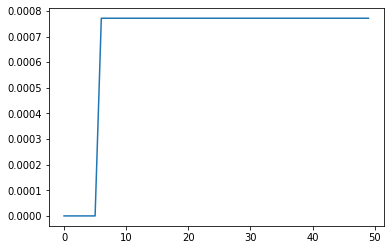

(0.0007712304822573138, 0.0007712304822573138)

In [32]:
get_score(ps[-1][1],0,0,True)

*************************************
AGGREGATION
*************************************

In [37]:
# Get results back

folder = 'results\\'
files = [ file for file in os.listdir(folder)[-1::-1] if instrument in file ]

results = [ pd.read_csv(folder+file)[['0','1']] for file in files ]

res_data = pd.DataFrame()
for i in range(len(files)):
    res_data = pd.concat([res_data,get_score(ast.literal_eval(results[i].iloc[-1,1]),0,0,False,True)])

weeks:  49
runs:  1470365.0
mean:  0.00020853701047542338  sum:  0.010218313513295748
sharpe:  0.36647149425098907
score:  0.010218313513295746  real score:  0.010218313513295746


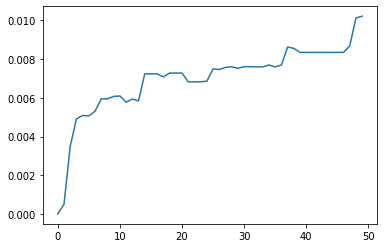

In [34]:
# Get performance stats for combined back results

weight_mod = 0
score_type = 0

grouped = res_data.groupby(res_data.v_id.str[:2]).v_profit
res = pd.DataFrame([grouped.count(),grouped.sum()]).T
res.columns = ['counts','sums']
res['means'] = res['sums'] / res['counts']

mean = res.means.mean()
weeks = res.shape[0]
runs = res.counts.sum()
sharpe = mean / res.means.std() if res.means.std() != 0 else 0
scaled_mean = mean + weight_mod
scaled_sharpe = sharpe + weight_mod

scaled_score = (weeks * scaled_mean if weeks > 10 else np.NINF) if score_type == 0 else \
        (weeks * scaled_mean**3 * runs if weeks > 10 else np.NINF) if score_type == 1 else \
        (weeks * scaled_sharpe if weeks > 10 else np.NINF)

real_score = weeks * mean

print('weeks: ',weeks)
print('runs: ',runs)
print('mean: ',res.means.mean(),' sum: ',res.means.sum())
print('sharpe: ',res.means.mean()/res.means.std())
print('score: ',scaled_score,' real score: ',real_score)
plt.plot([ res.means[:x].sum() for x in range(res.shape[0]+1) ])
plt.show()

**********************************
GENETIC ALGORITHM
**********************************
-not using as of 20200113

In [35]:


# mean_mod = 1
# score_type = 3 # sharpe * weeks

# ps = []
# scores = [np.NINF]
# pop_size = 40
# num_generations = 10
# for generation in range(num_generations):

#     # Get Population
#     while len(ps) < pop_size:

#         p = np.ones(44) * -2 if generation == 0 else random.choice(ps)[1]

#         num_ones = np.random.randint(0,len(p))
#         arr = [ 1 for i in range(num_ones)] + [ 0 for i in range(len(p) - num_ones)]
#         screen = np.random.permutation(arr)

#         new_p = [ val + np.random.normal(0,np.random.random()*2) * screen[i] for i,val in enumerate(p)]

#         score = get_score(new_p,score_type,mean_mod)#+(i/num_runs))


#         if score > scores[-1]:
#             ps.append([score,new_p])
    
#         print('num members: ',len(ps),' score: ',score)
    
#     # Split population randomly
#     num_ones = int(pop_size / 2.0)
#     arr = [ 1 for i in range(num_ones)] + [ 0 for i in range(pop_size - num_ones)]
#     group_screen = np.random.permutation(arr)

#     group1 = [ ps[x] for x in range(pop_size) if group_screen[x] ]
#     group2 = [ ps[x] for x in range(pop_size) if not group_screen[x] ]

#     # Select better group
#     score1 = np.mean([ group1[i][0] for i in range(len(group1)) ])
#     score2 = np.mean([ group2[i][0] for i in range(len(group2)) ])

#     if score1 > score2:
#         scores.append(score1)
#         ps = group1
#         print('Generation: ',generation,' Group1 selected! score: ',score1,'*******************************************************')
#     else:
#         scores.append(score2)
#         ps = group2
#         print('Generation: ',generation,' Group2 selected! score: ',score2,'*******************************************************')

In [36]:
# get_score(ps[-19][1],0,0,True)